<a href="https://colab.research.google.com/github/chousin/projek_pertama/blob/master/tugas_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('mode.chained_assignment', None)
palette=sns.color_palette('magma')
sns.set(palette=palette)

In [6]:
train_data=pd.read_csv('Corona_NLP_train.csv', encoding='latin-1')
test_data=pd.read_csv('Corona_NLP_test.csv', encoding='latin-1')

train_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [7]:
train_data.shape

(4022, 6)

In [8]:
test_data.shape

(3798, 6)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4022 entries, 0 to 4021
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       4022 non-null   int64 
 1   ScreenName     4022 non-null   int64 
 2   Location       3191 non-null   object
 3   TweetAt        4022 non-null   object
 4   OriginalTweet  4022 non-null   object
 5   Sentiment      4022 non-null   object
dtypes: int64(2), object(4)
memory usage: 188.7+ KB


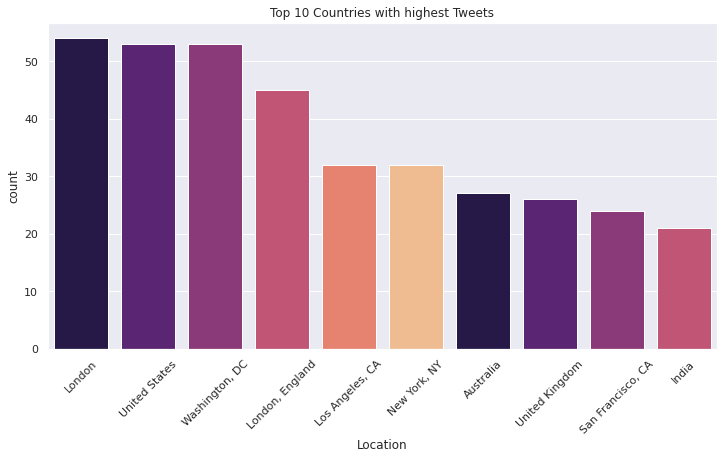

In [10]:
plt.figure(figsize=(12,6))
plt.title('Top 10 Countries with highest Tweets')
countries =sns.countplot(x='Location', data=train_data, order=train_data['Location'].value_counts().index[:10], palette=palette)
countries.set_xticklabels(countries.get_xticklabels(), rotation=45)
plt.show() 

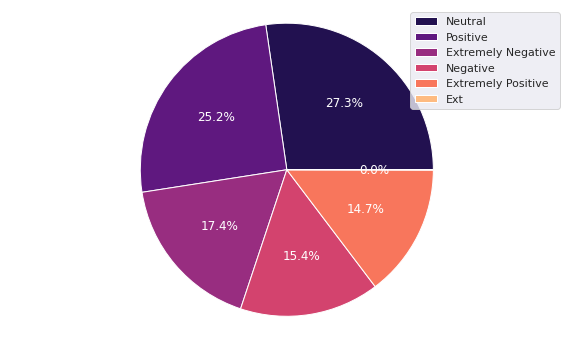

In [11]:
plt.figure(figsize=(10,6))
plt.pie(train_data['Sentiment'].value_counts(), labels=train_data['Sentiment'].unique(), autopct='%.1f%%', textprops={'color':"w"})
plt.legend(loc='upper right')
plt.axis('equal')
plt.show()

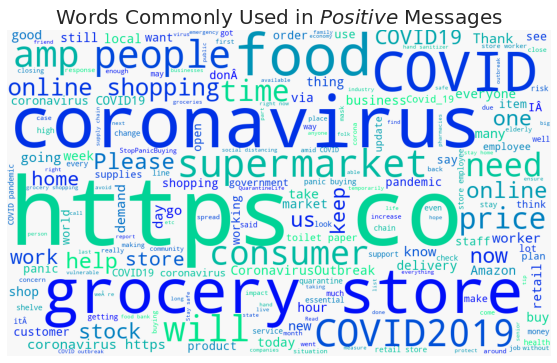

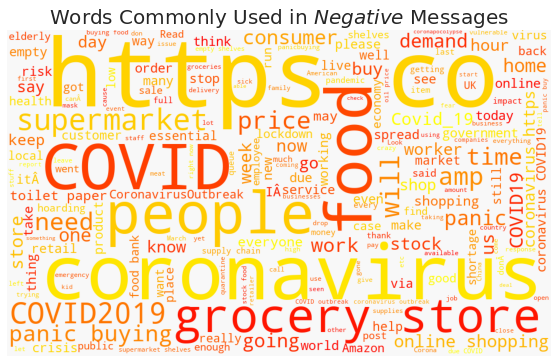

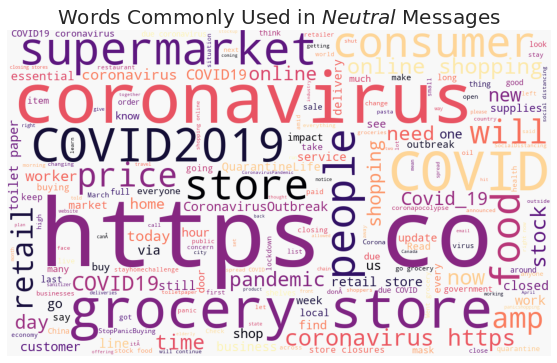

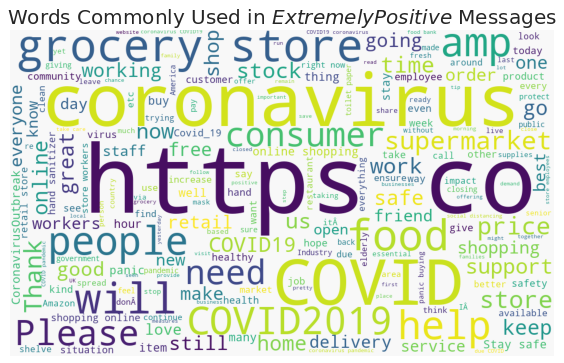

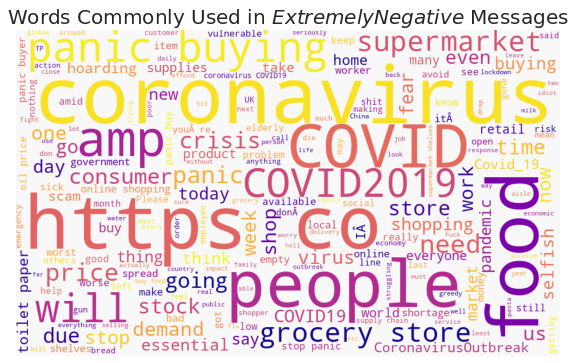

In [12]:
from wordcloud import WordCloud
for label, cmap in zip(['Positive', 'Negative', 'Neutral', 'Extremely Positive', 'Extremely Negative'],
                       ['winter', 'autumn', 'magma', 'viridis', 'plasma']):
    text = train_data.query('Sentiment == @label')['OriginalTweet'].str.cat(sep=' ')
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in ${label}$ Messages", size=20)
    plt.show()

In [13]:
train_df= train_data[['OriginalTweet','Sentiment']]
test_df= test_data[['OriginalTweet','Sentiment']]

train_df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [14]:
train_df.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [15]:
test_df.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [23]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

True

In [25]:
import string
import re
import nltk

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    #remove links starting with http
    text1 = re.sub(r'http\S+', ' ', text)
    #remove digits
    text2 = re.sub(r'\d+',' ', text1)
    tokens = re.split('\W+', text2)
    text = [word for word in tokens]
    return text

In [26]:
train_df['OriginalTweetClean'] = train_df['OriginalTweet'].apply(lambda x: clean_text(x))
test_df['OriginalTweetClean'] = test_df['OriginalTweet'].apply(lambda x: clean_text(x))

train_df.head()

,OriginalTweet,Sentiment,OriginalTweetClean
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,"[menyrbie, philgahan, chrisitv, and, and, ]"
1,advice Talk to your neighbours family to excha...,Positive,"[advice, talk, to, your, neighbours, family, t..."
2,Coronavirus Australia: Woolworths to give elde...,Positive,"[coronavirus, australia, woolworths, to, give,..."
3,My food stock is not the only one which is emp...,Positive,"[my, food, stock, is, not, the, only, one, whi..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"[me, ready, to, go, at, supermarket, during, t..."


In [29]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
#The maximum number of words to be used(most frequent)
MAX_NB_WORDS = 10000
#Max number of words in each Tweet
MAX_SEQUENCE_LENGTH = 100


# Initialize and fit the tokenizer
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True, split=' ')
tokenizer.fit_on_texts(X_train)


In [30]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_seq[10]

[25,
 537,
 77,
 2473,
 110,
 2474,
 8,
 1,
 170,
 39,
 279,
 1214,
 1885,
 25,
 1,
 144,
 3,
 245,
 1,
 1114,
 474,
 116,
 11,
 63,
 398,
 1,
 425,
 5499,
 3,
 3829,
 17,
 7,
 839,
 31,
 3830,
 302,
 4,
 2990,
 6]